# Giới thiệu Tensorflow

References: 

* https://www.tensorflow.org/
* https://www.datacamp.com/community/tutorials/tensorflow-tutorial

TensorFlow is a general-purpose system for graph-based computation.

TensorFlow gets its name from tensors, which are arrays of arbitrary dimensionality. A vector is a 1-d array and is known as a 1st-order tensor. A matrix is a 2-d array and a 2nd-order tensor. The "flow" part of the name refers to computation flowing through a graph. Training and inference in a neural network, for example, involves the propagation of matrix computations through many nodes in a computational graph.

When you think of doing things in TensorFlow, you might want to think of creating tensors (like matrices), adding operations (that output other tensors), and then executing the computation (running the computational graph). In particular, it's important to realize that when you add an operation on tensors, **it doesn't execute immediately**. Rather, TensorFlow waits for you to define all the operations you want to perform. Then, TensorFlow optimizes the computation graph, deciding how to execute the computation, before generating the data. Because of this, a tensor in TensorFlow isn't so much holding the data as a placeholder for holding the data, waiting for the data to arrive when a computation is executed."

In [18]:
from __future__ import print_function

import numpy as np
import tensorflow as tf
import time

Add two vectors

In [19]:
with tf.Session():
    input1 = tf.constant([1.0, 1.0, 1.0, 1.0])
    input2 = tf.constant([2.0, 2.0, 2.0, 2.0])
    output = tf.add(input1, input2)
    print('output:', output)
    result = output.eval()
    print("result: ", result)

output: Tensor("Add_2:0", shape=(4,), dtype=float32)
result:  [ 3.  3.  3.  3.]


In [22]:
print([x + y for x, y in zip([1.0] * 4, [2.0] * 4)])

[3.0, 3.0, 3.0, 3.0]


In [23]:
x, y = np.full(4, 1.0), np.full(4, 2.0)
print("{} + {} = {}".format(x, y, x + y))

[ 1.  1.  1.  1.] + [ 2.  2.  2.  2.] = [ 3.  3.  3.  3.]


Broadcast multiply

In [31]:
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)
print(result)
# TODO student add code to see result value

Tensor("Mul_16:0", shape=(4,), dtype=int32)


Many operators

In [37]:
with tf.Session():
    input1 = tf.constant(1.0, shape=[4])
    input2 = tf.constant(2.0, shape=[4])
    input3 = tf.constant(3.0, shape=[4])
    output = tf.add(tf.add(input1, input2), input3)
    result = output.eval()
    print(result)

[ 6.  6.  6.  6.]


Override operator

In [35]:
with tf.Session():
    input1 = tf.constant(1.0, shape=[4])
    input2 = tf.constant(2.0, shape=[4])
    output = input1 + input2
    print(output.eval())

[ 3.  3.  3.  3.]


Ngoài eval(), chúng ta thường dùng session.run() để thực hiện việc tính toán các giá trị của tensor, với tensor *output* ở trên chúng ta có thể tính giá trị như dưới.

In [38]:
with tf.Session() as sess:
    result = sess.run(output)
    print(result)

[ 6.  6.  6.  6.]


In [39]:
with tf.Session():
    input_features = tf.constant(np.reshape([1, 0, 0, 1], (1, 4)).astype(np.float32))
    weights = tf.constant(np.random.randn(4, 2).astype(np.float32))
    output = tf.matmul(input_features, weights)
    print("Input:")
    print(input_features.eval())
    print("Weights:")
    print(weights.eval())
    print("Output:")
    print(output.eval())

Input:
[[ 1.  0.  0.  1.]]
Weights:
[[-0.47019872  0.71016526]
 [ 0.0022694  -0.12541802]
 [ 0.41656488  0.72025007]
 [ 0.78675419 -1.37740159]]
Output:
[[ 0.31655547 -0.66723633]]


**Làm quen với khái niệm**:

Sinh viên đọc và chú ý phân biệt ý nghĩa sử dụng của chúng:

* https://www.tensorflow.org/api_docs/python/tf/placeholder

* https://www.tensorflow.org/api_docs/python/tf/Variable

Placeholder example

In [ ]:
x = tf.placeholder(tf.float32, shape=(1024, 1024))
y = tf.matmul(x, x)

with tf.Session() as sess:
  print(sess.run(y))  # ERROR: will fail because x was not fed.

  rand_array = np.random.rand(1024, 1024)
  print(sess.run(y, feed_dict={x: rand_array}))  # Will succeed.

Variables: https://www.tensorflow.org/programmers_guide/variables

In [ ]:
# run this 2 times may cause error: Variable v already exists
with tf.Session() as sess:
    v = tf.get_variable("v", shape=(), initializer=tf.zeros_initializer())
    assignment = v.assign_add(1)
    tf.global_variables_initializer().run()
    print(assignment.eval())

In [ ]:
#@test {"output": "ignore"}
import tensorflow as tf
import numpy as np

with tf.Session() as sess:
    # Set up two variables, total and weights, that we'll change repeatedly.
    total = tf.Variable(tf.zeros([1, 2]))
    weights = tf.Variable(tf.random_uniform([1,2]))

    # Initialize the variables we defined above.
    tf.global_variables_initializer().run()

    # This only adds the operators to the graph right now. The assignment
    # and addition operations are not performed yet.
    update_weights = tf.assign(weights, tf.random_uniform([1, 2], -1.0, 1.0))
    update_total = tf.assign(total, tf.add(total, weights))
  
    for _ in range(5):
        # Actually run the operation graph, so randomly generate weights and then
        # add them into the total. Order does matter here. We need to update
        # the weights before updating the total.
        sess.run(update_weights)
        sess.run(update_total)
    
        print(weights.eval(), total.eval())

Linear Regression Example from: [aymericdamien](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/linear_regression.ipynb)

In [ ]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [ ]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [ ]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [ ]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [ ]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [ ]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [ ]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [ ]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), 
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

**Tensorflow arithmetic operators**

https://www.tensorflow.org/api_guides/python/math_ops#Arithmetic_Operators

## Bài tập

Bài nộp của sinh viên là chính là **file này** sau khi được đổi tên thành **MSSV.E9_introduction_numpy.ipynb** và đừng quên ghi thông tin sinh viên vào các ô ở dưới.

Địa chỉ nộp bài: https://www.dropbox.com/request/h084jC1ZUTkUm5gosR6l

Deadline nộp bài: **10:00 thứ 2 tuần tiếp theo**

*Điểm bài này sẽ được tổng hợp với điểm chấm trên lớp (nếu có) để ra điểm cuối cùng*

Thông tin sinh viên:

In [5]:
sid = '1410160'
name = 'Doãn Kỳ Ân'

import tensorflow as tf
import numpy as np
import time

# sinh viên import các thư viện cần thiết ở đây

### Bài 1
Trong bài này, sinh viên sẽ tập làm quen với các thao tác cơ bản trên numpy, tensorflow, so sánh, đánh giá đơn giản về tốc độ tính toán

a) Sinh viên viết hàm matrix_gen(m, n) để sinh ra ma trận các số thực trong khoảng [0, 1] ngẫu nhiên, output là python array biểu diễn cho ma trận. Sử dụng hàm để sinh ra hai ma trận và lưu vào hai biến tương ứng đã cho để sử dụng cho các câu tiếp theo.

In [6]:
# code sinh viên cho câu a
def matrix_gen(m, n):
    return np.random.rand(m,n)

m, n, k=50, 40, 60
matrix_mn = matrix_gen(m, n)
matrix_nk = matrix_gen(n, k)

b) Hãy viết một hàm py_matrix_mul(matrix_1, matrix_2) để nhân hai ma trận được truyền vào trong đó không sử dụng numpy, tensorflow hay các thư viện khác. (giả sử input đã đúng không cần kiểm tra

In [8]:
# code câu b của sinh viên
def py_matrix_mul(matrix_1, matrix_2):
    rows_m1 = len(matrix_1)
    cols_m1 = len(matrix_1[0])
    rows_m2 = len(matrix_2)
    cols_m2 = len(matrix_2[0])
    if cols_m1 != rows_m2:
        return None
    m3 = [[0 for row in range(cols_m2)] for col in range(rows_m1)]
    for i in range(rows_m1):
        for j in range(cols_m2):
            for k in range(cols_m1):
                m3[i][j] += matrix_1[i][k] * matrix_2[k][j]
    return m3
    
start_time = time.clock()
mt_mul_py = py_matrix_mul(matrix_mn, matrix_nk)
print (time.clock() - start_time, "s")

0.1398007994827104 s


c) Sử dụng numpy để hiện thực cho bài toán nhân hai ma trận với hai ma trân *matrix_mn* và *matrix_nk*, lưu kết quả cuối cùng vào mt_mul_numpy

In [9]:
# code câu c của sinh viên
start_time = time.clock()
mt_mul_numpy2 = np.matmul(matrix_mn,matrix_nk)
print (time.clock() - start_time, "s")

0.0003411174524750038 s


d) Sử dụng tensorflow để hiện thực cho câu c thay vì dùng numpy

In [10]:
# code câu d của sinh viên
w1 = tf.constant(matrix_mn)
w2 = tf.constant(matrix_nk)
with tf.Session() as sess:
    start_time = time.clock()
    print(tf.matmul(matrix_mn,matrix_nk))
    print (time.clock() - start_time, "s")

Tensor("MatMul:0", shape=(50, 60), dtype=float64)
0.038846938485960436 s


e) Với các câu b, c, d, hãy chèn đoạn code để tính thời gian thực thi của mỗi phương pháp và so sánh, đánh giá về mặt thời gian thực thi của các thao tác.

Nhận xét của sinh viên: ...Xét tương đối, numpy có thời gian thực thi nhanh nhất, sau đó là dùng tensorflow và cuối cùng là dùng code tự định nghĩa...

### Bài 2

Cho đoạn code sinh dữ liệu cho hàm f() như bên dưới.
Sinh viên hãy chỉnh sửa đoạn code Linear Regression, 
chọn các tham số phù hợp để ra được kết quả tốt nhất có thể.

In [11]:
def f(x):
    return x * 5 + 3

llen = 50
x = np.random.rand(llen)
y = f(x) + np.random.normal(0, 0.1, llen)

print('x', x)
print('y', y)

train_X = x
train_Y = y
n_samples = train_X.shape[0]

x [ 0.33662382  0.44327684  0.81813978  0.10153468  0.46186941  0.57174979
  0.82005671  0.89496667  0.34045827  0.44714839  0.64262727  0.01540209
  0.74519241  0.02125382  0.18816657  0.09659365  0.30779269  0.91100676
  0.81315699  0.00318172  0.21544875  0.40045177  0.38424811  0.00227055
  0.88016172  0.55855746  0.13127979  0.21373883  0.79150234  0.8728264
  0.73489713  0.12007187  0.36708637  0.36044712  0.05307366  0.43707601
  0.36367022  0.96672421  0.64319015  0.84034755  0.8828511   0.63547808
  0.35706254  0.330044    0.86711526  0.48871831  0.1699792   0.70112912
  0.48678351  0.84823583]
y [ 4.84132226  5.23112138  7.05279047  3.70947171  5.22076921  5.98900516
  7.24142429  7.54786184  4.72868162  5.27400291  6.32320077  2.8237808
  6.70675127  3.24990411  4.10195415  3.51253767  4.52308246  7.4664946
  7.10245855  2.95886707  4.09487907  4.95622558  5.06127326  2.9706216
  7.32986273  5.74617853  3.70698391  4.01877131  7.11838213  7.29750849
  6.70900446  3.61706915 

*Code sinh viên ở dưới*

x [ 0.88770667  0.89767841  0.27194767  0.98677757  0.17480492  0.36786598
  0.33952929  0.31353668  0.61376222  0.33982875  0.054411    0.05970079
  0.72316703  0.91157171  0.64163925  0.32057344  0.48874549  0.34918167
  0.48816637  0.78848167  0.14614382  0.47094849  0.37719179  0.76039619
  0.19408278  0.03209441  0.80027588  0.57218146  0.11990212  0.8867351
  0.0465765   0.01985759  0.85502549  0.17277004  0.30424848  0.01994542
  0.40506109  0.79555046  0.91426377  0.34264104  0.05745298  0.33269505
  0.3818036   0.61309142  0.88271261  0.46065095  0.93989291  0.05704403
  0.04509323  0.0112809 ]
y [ 7.43936634  7.53524979  4.311024    8.00768962  3.99175284  4.84304192
  4.80363866  4.61738672  6.0175002   4.78982957  3.28971785  3.208383
  6.45213332  7.45385897  6.12828828  4.76491629  5.58383667  4.77607845
  5.24789199  6.87819371  3.61796291  5.4286672   4.77342622  6.82179351
  3.85724322  3.18657543  7.13208259  5.75719759  3.44410325  7.42423087
  3.34963239  3.19176228

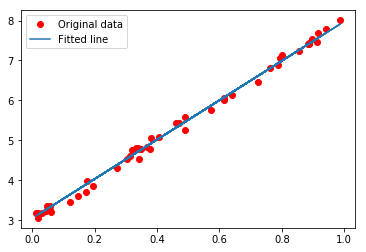

In [21]:
# TODO
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
def f(x):
    return x * 5 + 3

llen = 50
x = np.random.rand(llen)
y = f(x) + np.random.normal(0, 0.1, llen)
print('x', x)
print('y', y)
train_X = x
train_Y = y
n_samples = train_X.shape[0]
learning_rate = 1
training_epochs = 50
display_step = 5

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

#Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), 
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


*Những nhận xét đánh giá của sinh viên*:
    Việc chọn hệ số học learning-rate phù hợp ảnh hưởng quan trọng đến việc training.
...............................................................................

...............................................................................